In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pprint
from pandas import DataFrame
from datetime import date, time, timedelta

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display
from unidecode import unidecode

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [43]:
df = pd.read_csv('../capstone/02_datasets/00_originals/resort/intranet_exported/Sheet 1-Table 1.csv')

In [29]:
lifts = pd.read_csv('../capstone/02_datasets/00_originals/resort/intranet_exported/Sheet 2-Table 1.csv')

In [30]:
season_openings = pd.read_csv('../capstone/02_datasets/00_originals/resort/intranet_exported/Sheet 3-Table 1.csv')

In [ ]:
df.info()

In [44]:
df = df.iloc[:,2:5]

In [46]:
df.head()

,NZUTRNR,DATE,TOTAL_JOUR
0,162,1193871600,0
1,162,1193958000,0
2,162,1194044400,0
3,162,1194130800,0
4,162,1194217200,0


In [49]:
lifts.isnull().sum()

install_id                  0
install_nom                 0
install_type                2
install_responsable         0
install_group               0
install_secteur             0
install_longueur            8
install_alti_bas            8
install_alti_haut           8
install_debit_max           8
install_valeur              0
install_date                8
install_constructeur       13
install_nb_pylones         10
install_vitesse            10
install_nb_vehicules       10
install_sens_marche         0
install_espace_vehicule     8
install_diam_cable         10
install_long_cable         10
install_to_brin            10
install_prem_pylone         0
install_tension            20
install_puissance          10
install_photo               8
install_passages           33
install_places              0
install_tel_bas             7
install_tel_haut           19
install_code_ta             0
                           ..
Unnamed: 74                33
Unnamed: 75                33
Unnamed: 7

In [59]:
for item in lifts.columns:
    print (item)

install_id
install_nom
install_type
install_responsable
install_group
install_secteur
install_longueur
install_alti_bas
install_alti_haut
install_debit_max
install_valeur
install_date
install_constructeur
install_nb_pylones
install_vitesse
install_nb_vehicules
install_sens_marche
install_espace_vehicule
install_diam_cable
install_long_cable
install_to_brin
install_prem_pylone
install_tension
install_puissance
install_photo
install_passages
install_places
install_tel_bas
install_tel_haut
install_code_ta
install_ip_gateway
install_code_ta2
install_ip_gateway2
install_saison
Unnamed: 34
Unnamed: 35
Unnamed: 36
Unnamed: 37
Unnamed: 38
Unnamed: 39
Unnamed: 40
Unnamed: 41
Unnamed: 42
Unnamed: 43
Unnamed: 44
Unnamed: 45
Unnamed: 46
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
Unnamed: 52
Unnamed: 53
Unnamed: 54
Unnamed: 55
Unnamed: 56
Unnamed: 57
Unnamed: 58
Unnamed: 59
Unnamed: 60
Unnamed: 61
Unnamed: 62
Unnamed: 63
Unnamed: 64
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
U

In [62]:
for col in lifts.columns:
    if 'Unnamed' in col:
        del lifts[col]

In [64]:
lifts.isnull().sum()

install_id                  0
install_nom                 0
install_type                2
install_responsable         0
install_group               0
install_secteur             0
install_longueur            8
install_alti_bas            8
install_alti_haut           8
install_debit_max           8
install_valeur              0
install_date                8
install_constructeur       13
install_nb_pylones         10
install_vitesse            10
install_nb_vehicules       10
install_sens_marche         0
install_espace_vehicule     8
install_diam_cable         10
install_long_cable         10
install_to_brin            10
install_prem_pylone         0
install_tension            20
install_puissance          10
install_photo               8
install_passages           33
install_places              0
install_tel_bas             7
install_tel_haut           19
install_code_ta             0
install_ip_gateway         33
install_code_ta2            0
install_ip_gateway2        32
install_sa

In [69]:
for item in lifts.install_code_ta.unique():
    print (item)

print count(lifts.install_code_ta.unique())

SyntaxError: invalid syntax (<ipython-input-69-ffe0bf117762>, line 4)

In [71]:
unique_lifts = lifts.install_code_ta.unique()
len(unique_lifts)

32

In [77]:
unique_lifts_2 = lifts.install_code_ta2.unique()

In [73]:
lifts[lifts.install_code_ta == lifts.install_code_ta2]

,install_id,install_nom,install_type,install_responsable,install_group,install_secteur,install_longueur,install_alti_bas,install_alti_haut,install_debit_max,...,install_photo,install_passages,install_places,install_tel_bas,install_tel_haut,install_code_ta,install_ip_gateway,install_code_ta2,install_ip_gateway2,install_saison
31,36,Mappys,NaN,124,0,chavannes,NaN,NaN,NaN,NaN,...,NaN,NaN,1,608.0,NaN,0,NaN,0,NaN,H
32,37,Trappeurs,NaN,0,0,chavannes,NaN,NaN,NaN,NaN,...,NaN,NaN,1,460.0,NaN,0,NaN,0,NaN,H


In [76]:
lifts[lifts.install_code_ta2 != 0]

,install_id,install_nom,install_type,install_responsable,install_group,install_secteur,install_longueur,install_alti_bas,install_alti_haut,install_debit_max,...,install_photo,install_passages,install_places,install_tel_bas,install_tel_haut,install_code_ta,install_ip_gateway,install_code_ta2,install_ip_gateway2,install_saison
1,2,Chavannes,TC,124,318,chavannes,1545.0,1170.0,1482.0,1000.0,...,2.0,NaN,4,601.0,602.0,191,NaN,192,192.168.1.192,H
19,22,Mont chéry,TC,65,319,chery,0.0,1162.0,1535.0,1200.0,...,22.0,NaN,6,901.0,902.0,166,NaN,167,NaN,H
23,27,Pointe,TS,65,327,chery,979.0,1529.0,1815.0,1800.0,...,27.0,NaN,4,905.0,906.0,164,NaN,169,NaN,H
25,29,Chavannes Express été,TSD,0,0,chavannes,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,210,NaN,211,NaN,E
29,34,Mont-Chéry MP,TC,0,0,chery,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,214,NaN,215,NaN,E
30,35,Pointe été,TS,0,0,chery,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,216,NaN,217,NaN,E


In [88]:
lifts[lifts.install_code_ta.isin(unique_lifts_2)]
lifts['lift']=lifts.install_code_ta

In [86]:
df.columns = ['lift', 'date', 'total']

In [87]:
df.head()

,lift,date,total
0,162,1193871600,0
1,162,1193958000,0
2,162,1194044400,0
3,162,1194130800,0
4,162,1194217200,0


In [116]:
df = df.merge(lifts, on = 'lift')

In [92]:
season_openings = season_openings.iloc[:,0:3]

In [94]:
season_openings['premier_jour']

0     1214604000
1     1183154400
2     1198278000
3     1229727600
4     1151100000
5     1166828400
6     1246053600
7     1134774000
8     1261177200
9     1277503200
10    1292626800
11    1308952800
12    1324076400
13    1340402400
14    1356130800
15    1371852000
16    1387580400
17    1403301600
18    1419030000
19    1434751200
20    1450479600
21    1466200800
22    1481929200
Name: premier_jour, dtype: int64

In [95]:
season_openings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
saison          23 non-null object
premier_jour    23 non-null int64
ouv_anticip     23 non-null int64
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [100]:
season_openings.head()

,saison,premier_jour,ouv_anticip
0,E2008,1214604000,-21
1,E2007,1183154400,-21
2,H2007,1198278000,-35
3,H2008,1229727600,-21
4,E2006,1151100000,-21


In [111]:
import datetime
datetime.datetime.fromtimestamp(1214604000).date()

datetime.date(2008, 6, 27)

In [113]:
season_openings.premier_jour = season_openings.premier_jour.map(lambda x: datetime.datetime.fromtimestamp(x).date())

In [114]:
season_openings

,saison,premier_jour,ouv_anticip
0,E2008,2008-06-27,-21
1,E2007,2007-06-29,-21
2,H2007,2007-12-21,-35
3,H2008,2008-12-19,-21
4,E2006,2006-06-23,-21
5,H2006,2006-12-22,0
6,E2009,2009-06-26,-28
7,H2005,2005-12-16,-21
8,H2009,2009-12-18,0
9,E2010,2010-06-25,-28


In [117]:
df.head()

,lift,date,total,install_id,install_nom,install_type,install_responsable,install_group,install_secteur,install_longueur,...,install_photo,install_passages,install_places,install_tel_bas,install_tel_haut,install_code_ta,install_ip_gateway,install_code_ta2,install_ip_gateway2,install_saison
0,162,1193871600,0,23,Grande ourse,TS,65,325,chery,830.0,...,23.0,NaN,2,907.0,908.0,162,NaN,0,NaN,H
1,162,1193958000,0,23,Grande ourse,TS,65,325,chery,830.0,...,23.0,NaN,2,907.0,908.0,162,NaN,0,NaN,H
2,162,1194044400,0,23,Grande ourse,TS,65,325,chery,830.0,...,23.0,NaN,2,907.0,908.0,162,NaN,0,NaN,H
3,162,1194130800,0,23,Grande ourse,TS,65,325,chery,830.0,...,23.0,NaN,2,907.0,908.0,162,NaN,0,NaN,H
4,162,1194217200,0,23,Grande ourse,TS,65,325,chery,830.0,...,23.0,NaN,2,907.0,908.0,162,NaN,0,NaN,H


In [121]:
df['time'] = df.date.map(lambda x : datetime.datetime.fromtimestamp(x).time())

In [122]:
df['date'] = df.date.map(lambda x : datetime.datetime.fromtimestamp(x).date())

In [123]:
df.head()

,lift,date,total,install_id,install_nom,install_type,install_responsable,install_group,install_secteur,install_longueur,...,install_passages,install_places,install_tel_bas,install_tel_haut,install_code_ta,install_ip_gateway,install_code_ta2,install_ip_gateway2,install_saison,time
0,162,2007-10-31,0,23,Grande ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
1,162,2007-11-01,0,23,Grande ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
2,162,2007-11-02,0,23,Grande ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
3,162,2007-11-03,0,23,Grande ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
4,162,2007-11-04,0,23,Grande ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,15:00:00


In [125]:
df.date.min()

datetime.date(2005, 10, 31)

In [126]:
df.date.max()

datetime.date(2017, 1, 4)

In [128]:
# let's rename the 'install_nom' as 'l'
df = df.rename(columns = {'install_nom':'l'})

In [135]:
# function that lowers, and removes whitespaces plus int. chars from string
def clean_lift(l):
    result_numerical = ''.join('_' if i == ' ' else i for i in l)
    result_non_numerical = ''.join(i.lower() for i in result_numerical if not i.isdigit())
    result = result_non_numerical.lstrip('_').rstrip('_')
    return result

In [144]:
l = 'Super chéry'
result_numerical = ''.join('_' if i == ' ' else i for i in l)
result_non_numerical = ''.join(i.lower() for i in result_numerical if not i.isdigit())
result = result_non_numerical.lstrip('_').rstrip('_')
result

'super_chéry'

In [147]:
df.l = df.l.map(lambda x: clean_lift(x))

In [148]:
df.l.value_counts()

chavannes                5171
pointe                   5115
mont_chéry               2963
nauchets                 2686
super_chéry              2197
vieux_chêne              2017
boule_de_gomme           1996
grande_ourse             1954
ranfoilly                1868
tête_des_crêts           1861
la_croix                 1860
pérrières                1849
grains_d'or              1846
rosta                    1846
folliets                 1843
mouille_au_roy           1830
stade                    1827
turche                   1825
grand_cry                1824
mouille_aux_chats        1820
chéry_nord               1807
planeys                  1799
château                  1682
chavannes_express_été     900
mont-chéry_piéton         695
nauchets_été              673
mont-chéry_mp             418
pointe_été                418
mont-chéry_vtt            418
Name: l, dtype: int64

In [169]:
winter_15_16 = df[(df.date > datetime.date(2015,10, 1)) & (df.date < datetime.date(2016, 4, 1))]

In [170]:
winter_15_16[['l','lift','total']].groupby(['l']).sum().reset_index().sort_values('total', ascending = False)

,l,lift,total
1,chavannes,47232,1194002
16,nauchets,23862,804979
23,rosta,23001,648229
22,ranfoilly,23985,642823
9,la_croix,23247,600935
6,grains_d'or,24108,482856
21,pérrières,24231,343077
5,folliets,23370,315255
19,pointe,39975,214089
4,chéry_nord,20295,170879


In [156]:
datetime.date(2015, 1 , 1 )

datetime.date(2015, 1, 1)

In [155]:
df.date[0]

datetime.date(2007, 10, 31)

In [172]:
df.shape

(55008, 38)

In [173]:
df.head()

,lift,date,total,install_id,l,install_type,install_responsable,install_group,install_secteur,install_longueur,...,install_passages,install_places,install_tel_bas,install_tel_haut,install_code_ta,install_ip_gateway,install_code_ta2,install_ip_gateway2,install_saison,time
0,162,2007-10-31,0,23,grande_ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
1,162,2007-11-01,0,23,grande_ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
2,162,2007-11-02,0,23,grande_ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
3,162,2007-11-03,0,23,grande_ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,16:00:00
4,162,2007-11-04,0,23,grande_ourse,TS,65,325,chery,830.0,...,NaN,2,907.0,908.0,162,NaN,0,NaN,H,15:00:00


In [190]:
df['date'][0].month

10

In [211]:
df = df[(df.date.map(lambda x: x.month) >= 1) & (df.date.map(lambda x: x.month) < 4)]

In [212]:
df.date.min()

datetime.date(2006, 1, 1)

In [213]:
df.date.max()

datetime.date(2017, 1, 4)

In [220]:
busiest_lifts_ever = df[['l','lift', 'total']].groupby(['l','lift']).sum().reset_index().sort_values('total', ascending = False)
busiest_lifts_ever.head(10)

,l,lift,total
2,chavannes,193,8812123
17,nauchets,194,8251273
24,ranfoilly,195,6749210
25,rosta,187,6512091
10,la_croix,189,5305260
7,grains_d'or,196,5175383
23,pérrières,197,3779242
6,folliets,190,2986226
1,chavannes,191,2422600
21,pointe,164,2074539


In [233]:
df.head().T

,61,62,63,64,65
lift_nr,162,162,162,162,162
date,2008-01-01,2008-01-02,2008-01-03,2008-01-04,2008-01-05
total,0,0,0,0,53
install_id,23,23,23,23,23
l,grande_ourse,grande_ourse,grande_ourse,grande_ourse,grande_ourse
install_type,TS,TS,TS,TS,TS
install_responsable,65,65,65,65,65
install_group,325,325,325,325,325
install_secteur,chery,chery,chery,chery,chery
install_longueur,830,830,830,830,830


In [231]:
for col in df.columns:
    print (col)

lift_nr
date
total
install_id
l
install_type
install_responsable
install_group
install_secteur
install_longueur
install_alti_bas
install_alti_haut
install_debit_max
install_valeur
install_date
install_constructeur
install_nb_pylones
install_vitesse
install_nb_vehicules
install_sens_marche
install_espace_vehicule
install_diam_cable
install_long_cable
install_to_brin
install_prem_pylone
install_tension
install_puissance
install_photo
install_passages
install_places
install_tel_bas
install_tel_haut
install_code_ta
install_ip_gateway
install_code_ta2
install_ip_gateway2
install_saison
time


In [235]:
df = df.rename(columns = {
    
'total': 'entries',
'install_type': 'lift_type',
'install_responsable': 'lift_manager',
'install_group': 'lift_group',
'install_secteur': 'domain',
'install_longueur': 'lift_len',
'install_alti_bas': 'lift_alt_bottom',
'install_alti_haut': 'lift_alt_top',
'install_debit_max': 'lift_max_flow',
'install_valeur': 'lift_value',
'install_date': 'lift_install_date',
'install_constructeur': 'lift_builder',
'install_nb_pylones': 'lift_pylons_count',
'install_vitesse': 'lift_speed',
'install_nb_vehicules': 'lift_vehicles_count',
'install_sens_marche': 'lift_working_direction',
'install_espace_vehicule': 'lift_vehicle_space',
'install_diam_cable': 'lift_cable_diam',
'install_long_cable': 'lift_cable_len',
'install_to_brin': 'lift_to_brin',
'install_prem_pylone': 'lift_first_pylon',
'install_tension': 'lift_voltage',
'install_puissance': 'lift_power',
'install_photo': 'lift_pics',
'install_passages': 'lift_entries',
'install_places': 'lift_places',
'install_tel_bas': 'lift_tel_bottom',
'install_tel_haut': 'lift_tel_top',
'install_code_ta2': 'lift_nr_2',
'install_saison': 'lift_season'
    })

del df['install_code_ta']

In [236]:
df.head().T

,61,62,63,64,65
lift_nr,162,162,162,162,162
date,2008-01-01,2008-01-02,2008-01-03,2008-01-04,2008-01-05
entries,0,0,0,0,53
install_id,23,23,23,23,23
l,grande_ourse,grande_ourse,grande_ourse,grande_ourse,grande_ourse
lift_type,TS,TS,TS,TS,TS
lift_manager,65,65,65,65,65
lift_group,325,325,325,325,325
domain,chery,chery,chery,chery,chery
lift_len,830,830,830,830,830


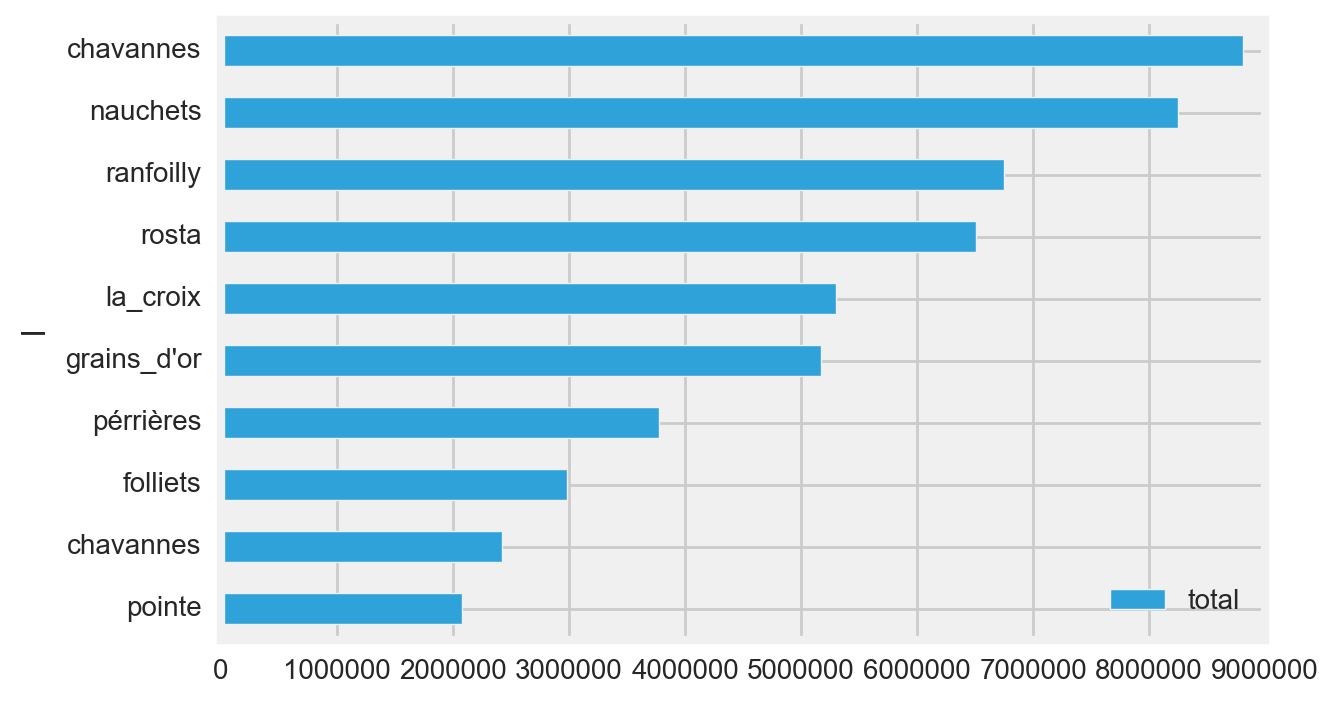

In [222]:
busiest_lifts_ever.head(10).sort_values('total', ascending = True).plot(kind = 'barh', x = 'l', y = 'total')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25782 entries, 61 to 54909
Data columns (total 37 columns):
lift_nr                   25782 non-null int64
date                      25782 non-null object
entries                   25782 non-null int64
install_id                25782 non-null int64
l                         25782 non-null object
lift_type                 25782 non-null object
lift_manager              25782 non-null int64
lift_group                25782 non-null int64
domain                    25782 non-null object
lift_len                  24762 non-null float64
lift_alt_bottom           24762 non-null float64
lift_alt_top              24762 non-null float64
lift_max_flow             24762 non-null float64
lift_value                25782 non-null object
lift_install_date         24762 non-null object
lift_builder              19790 non-null object
lift_pylons_count         22780 non-null float64
lift_speed                22780 non-null float64
lift_vehicles_count      

In [263]:
entries_per_date = df.groupby(['date']).sum().reset_index()
entries_per_date.head()

,date,lift_nr,entries,install_id,lift_manager,lift_group,lift_len,lift_alt_bottom,lift_alt_top,lift_max_flow,...,lift_to_brin,lift_first_pylon,lift_power,lift_pics,lift_entries,lift_places,lift_tel_bottom,lift_tel_top,install_ip_gateway,lift_nr_2
0,2006-01-01,4657,0,356,3107,7570,21264.0,33765.0,39708.0,33869.0,...,24500.0,26,4966.0,356.0,NaN,67,16754.0,10106.0,NaN,528
1,2006-01-02,4657,0,356,3107,7570,21264.0,33765.0,39708.0,33869.0,...,24500.0,26,4966.0,356.0,NaN,67,16754.0,10106.0,NaN,528
2,2006-01-03,4657,0,356,3107,7570,21264.0,33765.0,39708.0,33869.0,...,24500.0,26,4966.0,356.0,NaN,67,16754.0,10106.0,NaN,528
3,2006-01-04,4657,0,356,3107,7570,21264.0,33765.0,39708.0,33869.0,...,24500.0,26,4966.0,356.0,NaN,67,16754.0,10106.0,NaN,528
4,2006-01-05,4657,478047,356,3107,7570,21264.0,33765.0,39708.0,33869.0,...,24500.0,26,4966.0,356.0,NaN,67,16754.0,10106.0,NaN,528


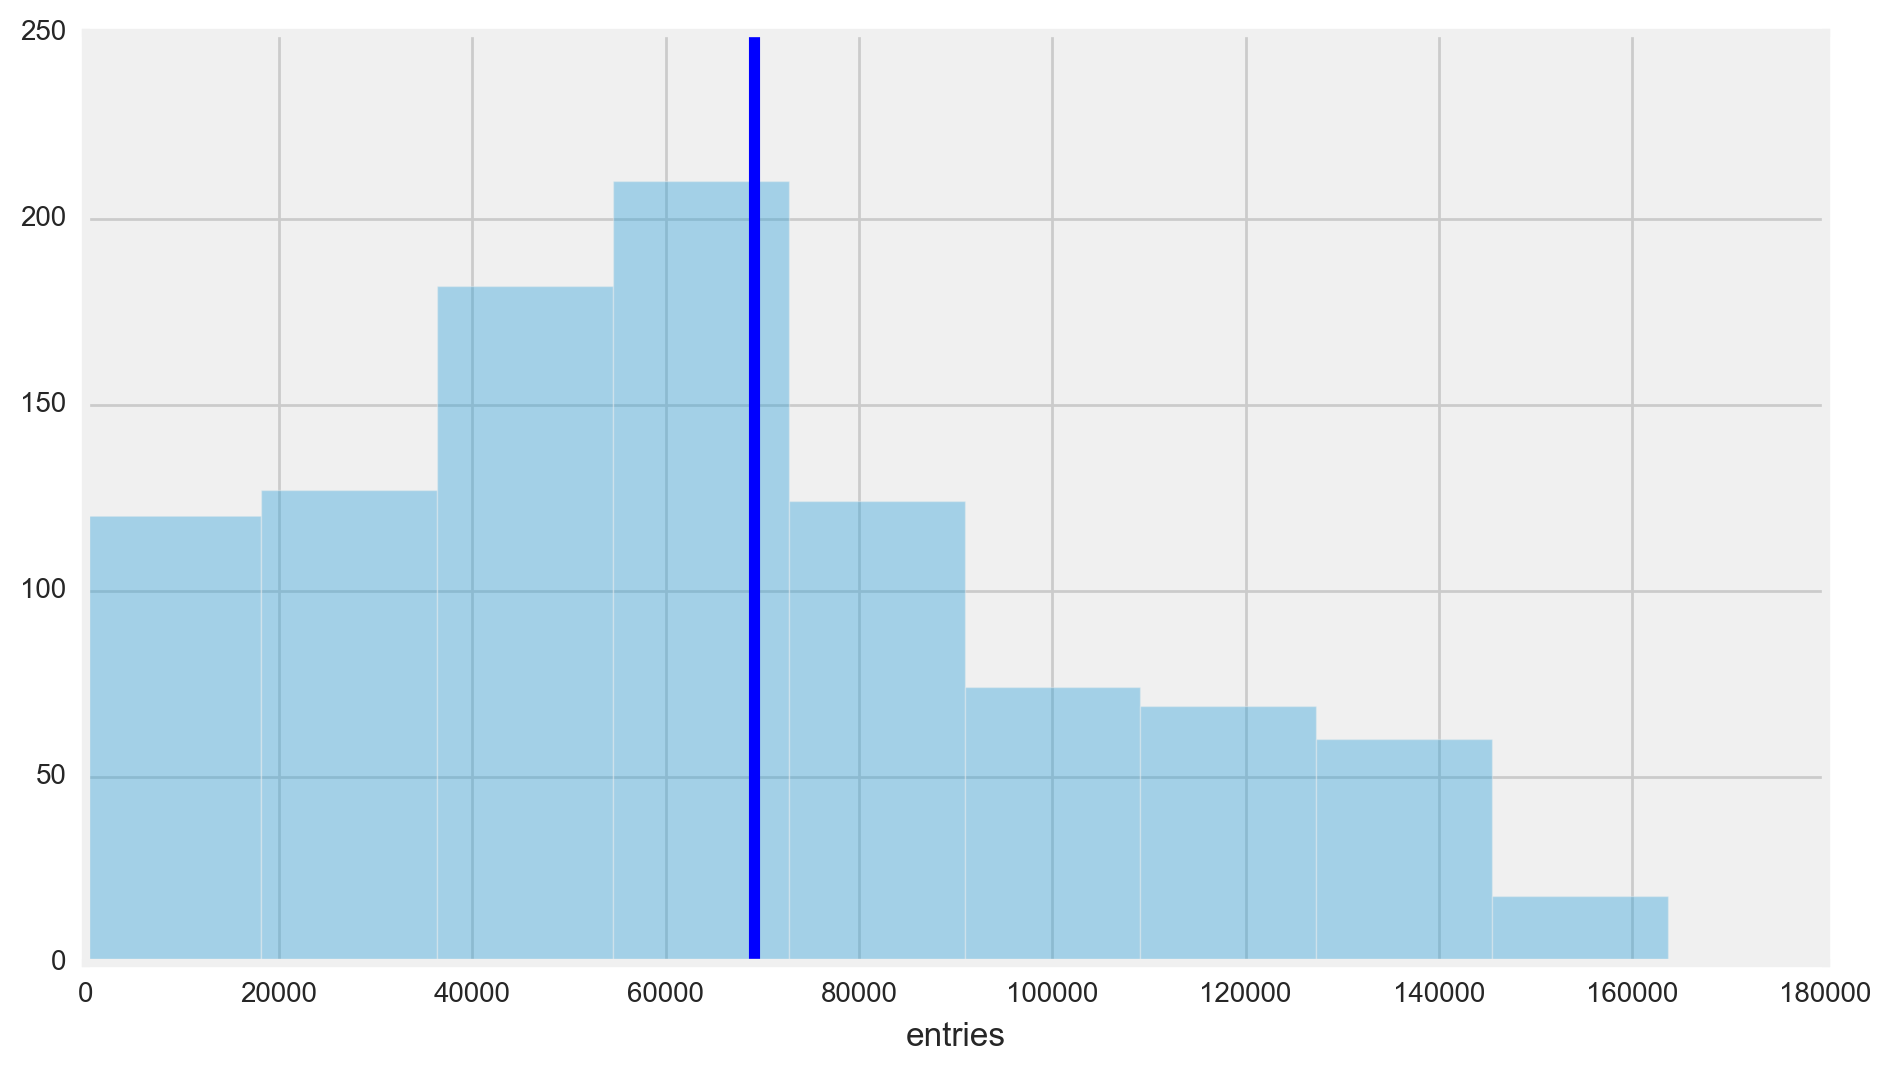

In [264]:
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.distplot(entries_per_date.entries, kde = False)
ax.set_xlim([0,180000])
ax.axvline(x = np.mean(entries_per_date.entries))

In [261]:
entries_per_date.describe()

,entries
count,997.000000
mean,69161.916750
std,70013.339542
min,0.000000
25%,36974.000000
50%,58791.000000
75%,88981.000000
max,909328.000000


In [ ]:
# I want boxplots of entries per season

In [267]:
df.head().T

,61,62,63,64,65
lift_nr,162,162,162,162,162
date,2008-01-01,2008-01-02,2008-01-03,2008-01-04,2008-01-05
entries,0,0,0,0,53
install_id,23,23,23,23,23
l,grande_ourse,grande_ourse,grande_ourse,grande_ourse,grande_ourse
lift_type,TS,TS,TS,TS,TS
lift_manager,65,65,65,65,65
lift_group,325,325,325,325,325
domain,chery,chery,chery,chery,chery
lift_len,830,830,830,830,830


In [277]:
df['season_year'] = df.date.map(lambda x:x.year)

In [280]:
df['season_month'] = df.date.map(lambda x:x.month)

In [319]:
df['day_of_week'] = df.date.map(lambda x : x.strftime('%A'))

In [321]:
df.head().T

,61,62,63,64,65
lift_nr,162,162,162,162,162
date,2008-01-01,2008-01-02,2008-01-03,2008-01-04,2008-01-05
entries,0,0,0,0,53
install_id,23,23,23,23,23
l,grande_ourse,grande_ourse,grande_ourse,grande_ourse,grande_ourse
lift_type,TS,TS,TS,TS,TS
lift_manager,65,65,65,65,65
lift_group,325,325,325,325,325
domain,chery,chery,chery,chery,chery
lift_len,830,830,830,830,830


In [323]:
entries_per_season = df[['season_year','entries']].groupby(['season_year']).sum().reset_index().sort_values('entries',ascending = False)

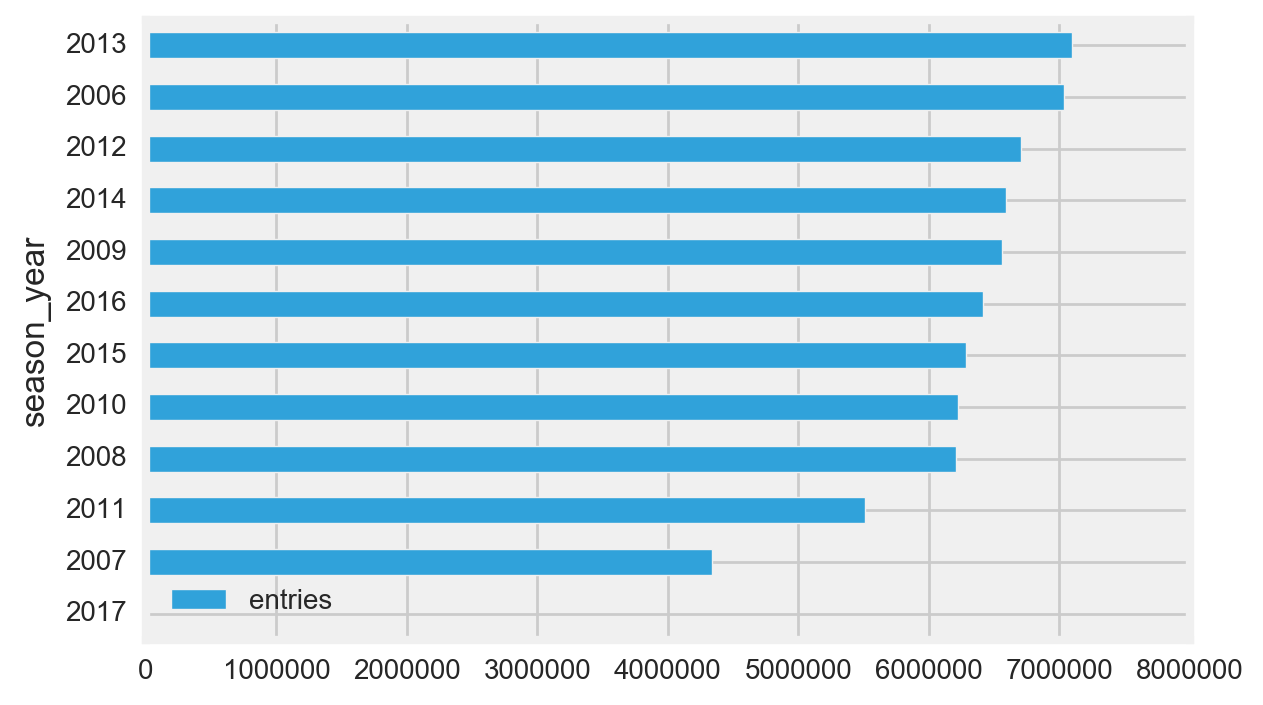

In [325]:
entries_per_season.sort_values('entries', ascending = True).plot(kind = 'barh', x = 'season_year', y = 'entries')

In [352]:
avg_entries_per_day_of_week = df[['day_of_week','entries']].groupby(['day_of_week']).sum().reset_index().sort_values('entries', ascending = False)

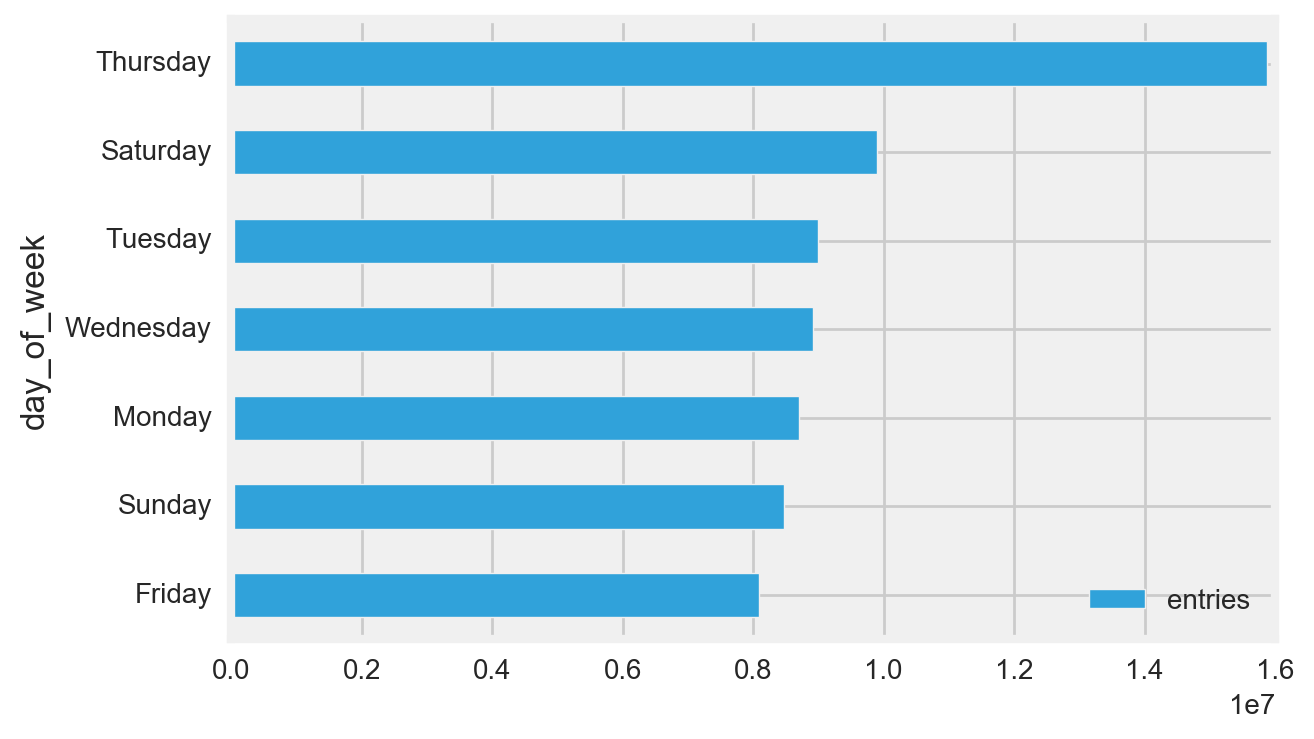

In [353]:
avg_entries_per_day_of_week.sort_values('entries', ascending = True).plot(kind = 'barh', x = 'day_of_week', y = 'entries')

In [341]:
len(df.date.unique())

997

In [343]:
df.shape

(25782, 40)

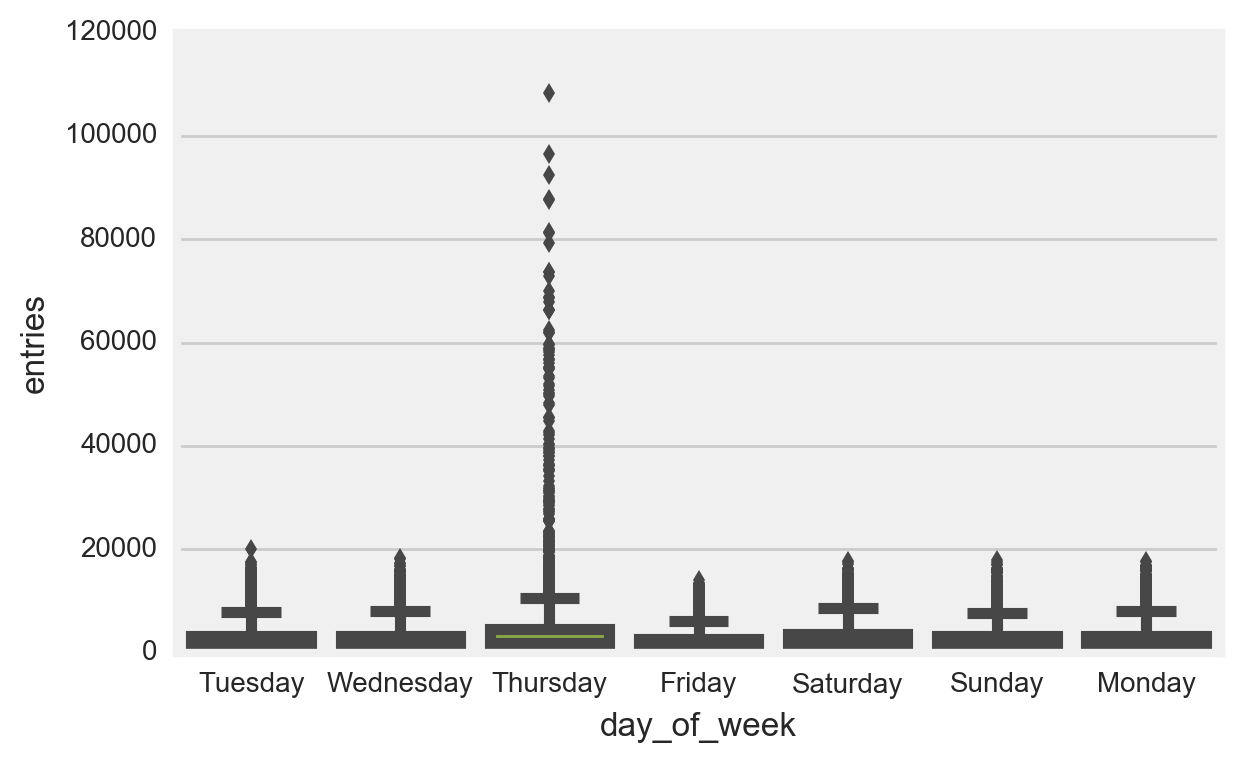

In [344]:
ax = sns.boxplot(x = 'day_of_week', y = 'entries', data = df)

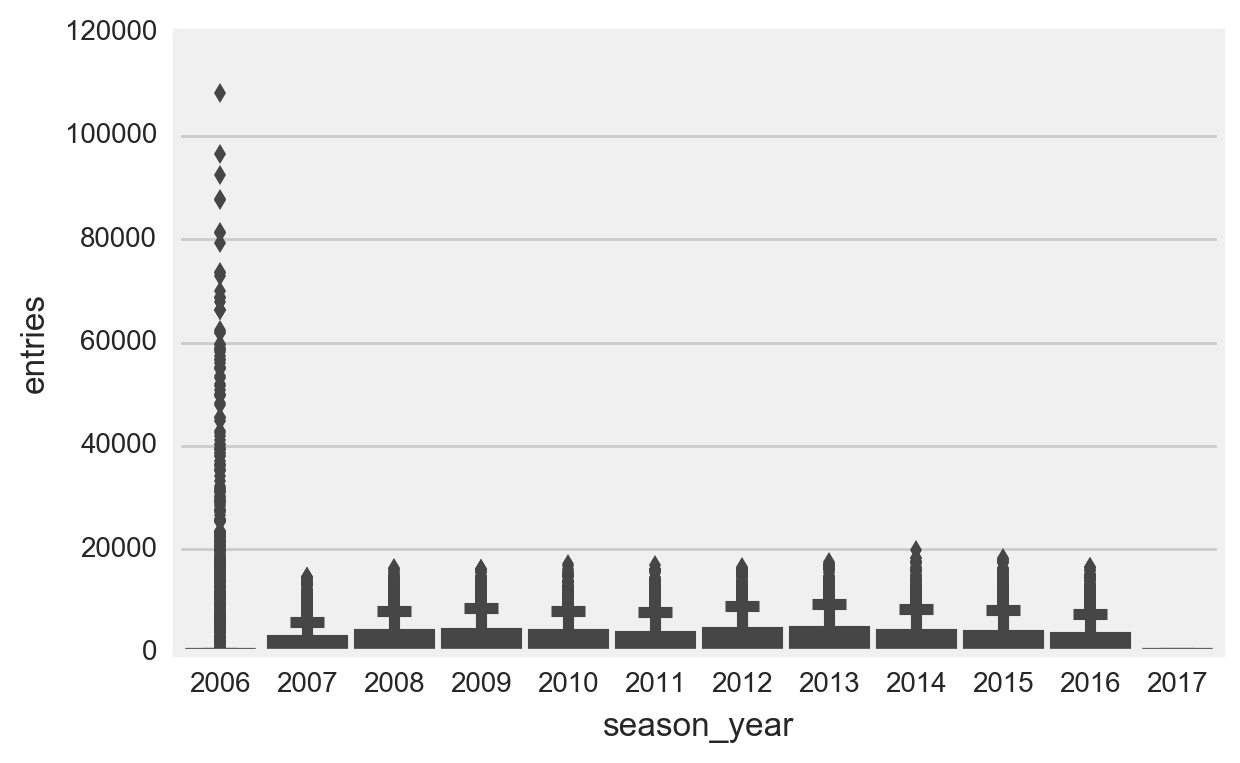

In [351]:
ax = sns.boxplot(x = 'season_year', y = 'entries', data = df)

In [348]:
df[['date', 'entries']][df['day_of_week'] == 'Thursday'].sort_values('entries', ascending = False)

,date,entries
42161,2006-02-23,108347
39210,2006-02-23,96493
42168,2006-03-02,92416
42147,2006-02-09,87879
42154,2006-02-16,87528
39196,2006-02-09,81466
39203,2006-02-16,81144
39217,2006-03-02,79228
24206,2006-02-23,73697
37285,2006-02-23,73572


In [350]:
df[['date', 'entries']][df['day_of_week'] == 'Thursday'][df['season_year'] != 2006].sort_values('entries', ascending = False)

/Users/medhimugnier/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,date,entries
42042,2014-03-06,18353
44050,2015-02-19,18329
43417,2013-02-28,16593
43067,2012-02-16,16401
43074,2012-02-23,16233
41475,2009-02-26,16203
41468,2009-02-19,16146
43869,2016-02-25,16083
41294,2008-02-21,16032
42796,2011-03-03,15945


In [355]:
df[['date', 'entries']][df['day_of_week'] == 'Wednesday'].sort_values('entries', ascending = False)

,date,entries
42043,2014-03-05,18276
44051,2015-02-18,18193
44043,2015-02-25,17295
43416,2013-02-27,17140
43696,2014-02-19,16676
43877,2016-02-17,16654
44036,2015-03-04,16086
43073,2012-02-22,16022
41474,2009-02-25,15964
42795,2011-03-02,15770


In [365]:
year_2006 = df[df.date < datetime.date(2006,12,31)]
year_2006.head()

,lift_nr,date,entries,install_id,l,lift_type,lift_manager,lift_group,domain,lift_len,...,lift_tel_bottom,lift_tel_top,install_ip_gateway,lift_nr_2,install_ip_gateway2,lift_season,time,season_year,season_month,day_of_week
672,162,2006-01-01,0,23,grande_ourse,TS,65,325,chery,830.0,...,907.0,908.0,NaN,0,NaN,H,15:00:00,2006,1,Sunday
673,162,2006-01-02,0,23,grande_ourse,TS,65,325,chery,830.0,...,907.0,908.0,NaN,0,NaN,H,15:00:00,2006,1,Monday
674,162,2006-01-03,0,23,grande_ourse,TS,65,325,chery,830.0,...,907.0,908.0,NaN,0,NaN,H,15:00:00,2006,1,Tuesday
675,162,2006-01-04,0,23,grande_ourse,TS,65,325,chery,830.0,...,907.0,908.0,NaN,0,NaN,H,15:00:00,2006,1,Wednesday
676,162,2006-01-05,11822,23,grande_ourse,TS,65,325,chery,830.0,...,907.0,908.0,NaN,0,NaN,H,15:00:00,2006,1,Thursday


In [367]:
year_2006[['season_month','entries']].groupby(['season_month']).sum().sort_values('entries',ascending = False).reset_index()

,season_month,entries
0,2,2977439
1,3,2153302
2,1,1902492


In [370]:
year_2011 = df[(df.date > datetime.date(2011,1,1)) & (df.date < datetime.date(2011,12,31))]
year_2011[['season_month','entries']].groupby(['season_month']).sum().sort_values('entries',ascending = False).reset_index()

,season_month,entries
0,2,2409285
1,3,1651618
2,1,1403080
